# sanity checks on `models.NMF` with emulator

In [1]:
import numpy as np 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# load NMF model and test the emulator without burst

In [3]:
m_nmf = Models.NMF(burst=False, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [4]:
# load test parameter and spectrum. These were generated for the validation of the trained Speculator model
test_w = np.load('/Users/chahah/data/provabgs/wave_fsps.npy')

test_theta = np.load('/Users/chahah/data/provabgs/fsps.nmf_bases.theta.test.npy')[:100]
test_logspec = np.load('/Users/chahah/data/provabgs/fsps.nmf_bases.lnspectrum.test.npy')[:100]

/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])


(3000.0, 10000.0)

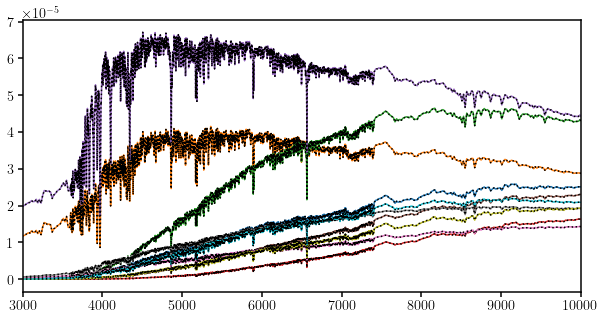

In [5]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in np.random.choice(range(100), size=10, replace=False): 
    w, f = m_nmf._sps_model(np.concatenate([[0.], test_theta[igal][:-1]]), m_nmf.cosmo.age(test_theta[igal][-1]).value)
    sub.plot(w, f)
    sub.plot(test_w, np.exp(test_logspec[igal]), c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [6]:
%timeit m_nmf._sps_model(np.concatenate([[0.], test_theta[0][:-1]]), m_nmf.cosmo.age(test_theta[0][-1]).value)

/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])


2.62 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# now with the burst component turned on

In [7]:
m_nmf = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [8]:
test_theta = np.load('/Users/chahah/data/provabgs/fsps.burst.theta.test.npy')[:100]
test_logspec = np.load('/Users/chahah/data/provabgs/fsps.burst.lnspectrum.test.npy')[:100]

/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:646: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabg

(3000.0, 10000.0)

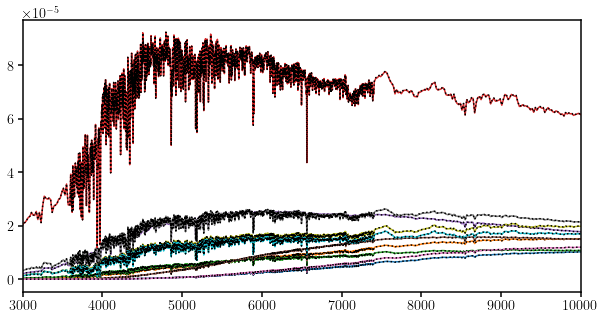

In [9]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in np.random.choice(range(100), size=10, replace=False): 
    w, f = m_nmf._sps_model(np.concatenate([[0., 1.], test_theta[igal][1:4], [1.], test_theta[igal][6:]]), m_nmf.cosmo.age(0.1).value)
    sub.plot(w, f)
    sub.plot(test_w, np.exp(test_logspec[igal]), c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [10]:
%timeit w, f = m_nmf._sps_model(np.concatenate([[0., 1.], test_theta[0][1:4], [1.], test_theta[0][6:]]), m_nmf.cosmo.age(0.1).value)

/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])


5.57 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# lets try running the SED

/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])


(3000.0, 10000.0)

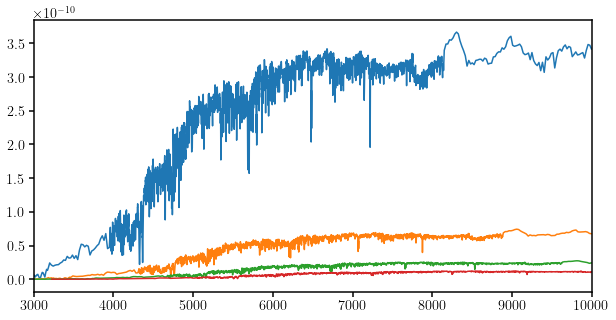

In [11]:
igal = 0
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for zred in [0.1, 0.2, 0.3, 0.4]: 
    w, f = m_nmf.sed(np.concatenate([[0., 1.], test_theta[igal][1:4], [1.], test_theta[igal][6:]]), zred)
    sub.plot(w, f)
sub.set_xlim(3e3, 1e4)

/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])
/Users/chahah/projects/provabgs/src/provabgs/models.py:708: RuntimeWarning: overflow encountered in exp
  layers.append((betas_[i] + (1.-betas_[i])*1./(1.+np.exp(-alphas_[i]*act[-1])))*act[-1])


(6000.0, 7500.0)

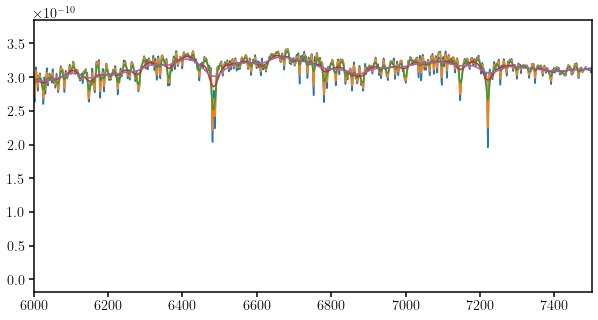

In [12]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for vdisp in [0., 50, 150, 500, 1000]: 
    w, f = m_nmf.sed(np.concatenate([[0., 1.], test_theta[igal][1:4], [1.], test_theta[igal][6:]]), 0.1, vdisp=vdisp)
    sub.plot(w, f)
sub.set_xlim(6000, 7500)